## 결정 트리 분류 모델 구현하기

### 데이터셋 준비 (iris)

### DecisionTreeClassifier 클래스 사용하기

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier         

X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [3]:
? DecisionTreeClassifier

Init signature:
 DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth 

In [4]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=3,
                             min_samples_split=3,
                             random_state=1234)
clf = clf.fit(X_train, y_train)

In [5]:
y_pred = clf.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print(f'정확도:{acc * 100: .2f}%')

정확도: 98.00%


### 트리 구조의 이해

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

X, y = load_iris(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [28]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1234)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1234)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.6\ngini = 0.667\nsamples = 100\nvalue = [33, 33, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.5\nsamples = 67\nvalue = [0, 33, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.061\nsamples = 32\nvalue = [0, 1, 31]')]

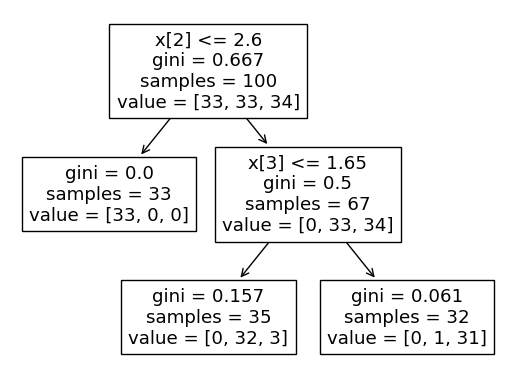

In [29]:
tree.plot_tree(clf)

In [30]:
y_pred = clf.predict(X_test)
acc = (y_test == y_pred).sum() / len(y_test)
print(f'정확도:{acc*100: .2f}%')

정확도: 96.00%


### 그리드 서치로 결정 트리의 하이퍼파라미터 튜닝하기 (사전 가지치기)

In [73]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.33,
                                                  random_state=1234)

In [74]:
max_depths = [None, 3, 6]   ### max_depth가 None이면, 잎 노드의 클래스가 동일할 때 까지 분할 (혹은 min_samples_leaf가 되거나)
min_samples_splits = [2, 3, 4]

In [75]:
from itertools import product

best_max_depth = None
best_min_samples_split = None

best_acc = 0

for max_depth, min_samples_split in product(max_depths, min_samples_splits):
    clf = DecisionTreeClassifier(random_state=1234,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split)
    y_pred = clf.fit(X_train, y_train).predict(X_val)
    
    acc = (y_pred == y_val).mean()
    if acc > best_acc:
        best_acc = acc
        best_max_depth = max_depth
        best_min_samples_split = min_samples_split

print('max_depth:', best_max_depth, '\nmin_samples_split:', 
      best_min_samples_split)

max_depth: 3 
min_samples_split: 2


In [76]:
clf = DecisionTreeClassifier(random_state=1234,
                             max_depth=best_max_depth,
                             min_samples_split=best_min_samples_split)

y_pred = clf.fit(X_train,y_train).predict(X_test)
print(f'정확도:{(y_pred == y_test).mean() * 100: .2f}%')

정확도: 88.30%


[Text(0.5, 0.875, 'x[7] <= 0.056\ngini = 0.471\nsamples = 255\nvalue = [97, 158]'),
 Text(0.25, 0.625, 'x[22] <= 117.45\ngini = 0.096\nsamples = 159\nvalue = [8, 151]'),
 Text(0.125, 0.375, 'x[29] <= 0.119\ngini = 0.039\nsamples = 152\nvalue = [3, 149]'),
 Text(0.0625, 0.125, 'gini = 0.026\nsamples = 151\nvalue = [2, 149]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.375, 'x[19] <= 0.002\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.625, 'x[27] <= 0.115\ngini = 0.135\nsamples = 96\nvalue = [89, 7]'),
 Text(0.625, 0.375, 'x[2] <= 108.065\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'x[10] <= 0.186\ngini = 0.043\nsamples = 90\nvalue = [88, 2]'),
 Text(0.8125, 0.

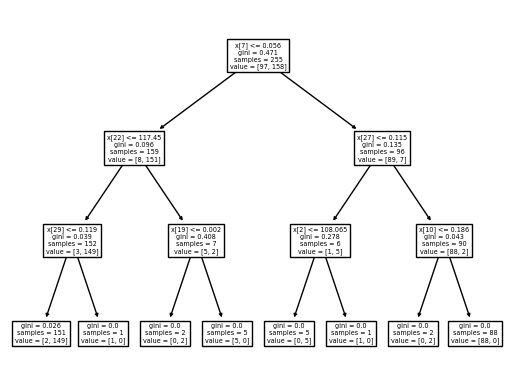

In [77]:
tree.plot_tree(clf)

### 결정 트리의 과대적합 (사전가지치기)

In [78]:
from sklearn.datasets import make_classification
? make_classification

In [79]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_classification(n_samples=2000,
                           n_features=20,
                           n_informative=15,
                           n_classes=2,
                           flip_y=0.2,
                           random_state=1234)

### flip_y 비율만큼 목적변수를 뒤집어서 노이즈를 생성

In [80]:
df = pd.DataFrame(X, columns=['Feature' + str(x) for x in range(1, 21)])
df['y'] = y

In [81]:
df

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20,y
0,2.543570,-2.070863,0.650493,-1.338459,-0.727696,1.275343,-2.172496,-1.423565,3.128256,-3.956888,...,1.411118,-3.033682,-0.925676,0.115857,-2.896672,-0.197488,-0.874396,0.620131,0.767547,1
1,-0.191281,5.180398,-2.743953,-3.739908,1.323370,2.985064,-0.545716,-2.972124,2.163721,-1.752018,...,-0.904421,2.953176,-1.414758,-1.382758,0.494466,-0.346004,-2.019634,-1.135787,-1.599677,0
2,0.609410,5.917604,-0.032416,-4.788994,0.088220,0.380237,2.567335,1.475611,-1.220653,4.138829,...,-0.075130,1.232298,1.670340,3.136994,0.217512,3.287693,-0.752089,-0.803080,4.787178,0
3,-0.144419,0.624896,3.950981,-0.819220,-0.564855,0.318645,0.109668,-0.271643,-0.179945,-2.636854,...,-1.005685,-1.415408,0.420795,0.735688,0.899187,0.026605,0.104579,0.139066,3.433113,1
4,1.234330,3.198811,2.435837,3.066712,-1.920831,2.454698,0.783842,-0.835244,-0.028098,-1.927568,...,1.820335,3.314074,0.748430,4.201721,0.076026,3.132563,-7.077750,0.272190,5.037005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-3.992012,-2.276473,-2.240180,0.029873,-0.016853,-4.012124,0.019410,-2.777506,2.085150,1.273228,...,3.459287,-1.504811,0.396680,0.267468,0.703698,-3.363843,-2.065908,0.182222,-8.434819,1
1996,-1.203147,-6.345190,-0.241215,-0.506447,0.957167,-1.319979,3.909301,2.698642,3.843288,-1.167464,...,0.415346,-4.314432,-0.121436,2.396141,3.761543,-2.251120,2.422507,-0.703545,-1.668570,0
1997,-1.958636,2.526298,-0.897997,-2.263121,-0.268561,-3.215593,-0.595114,-0.012260,2.308959,2.007943,...,-0.974758,-0.015146,0.410249,1.228456,4.027052,0.628025,-1.445284,-0.312168,-3.177206,1
1998,-3.447259,-2.451071,-1.589073,0.878658,1.364768,0.717595,-0.465668,2.057102,-0.465088,0.949719,...,2.181205,2.243929,-1.731654,0.205558,-0.259277,-2.209427,-0.587527,-0.470939,-2.875405,1


In [82]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:20],
                                                    df.iloc[:,-1],
                                                    test_size=0.25,
                                                    random_state=1234)

In [83]:
X2, y2 = make_classification(n_samples=2000,
                             n_features=20,
                             n_informative=3,
                             flip_y=0.99,
                             random_state=1234)
df2 = pd.DataFrame(X2, columns = ['Feature' + str(x) for x in range(1, 21)])
df2['y'] = y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.iloc[:,:20],
                                                    df2.iloc[:,-1],
                                                    test_size=0.25,
                                                    random_state=1234)

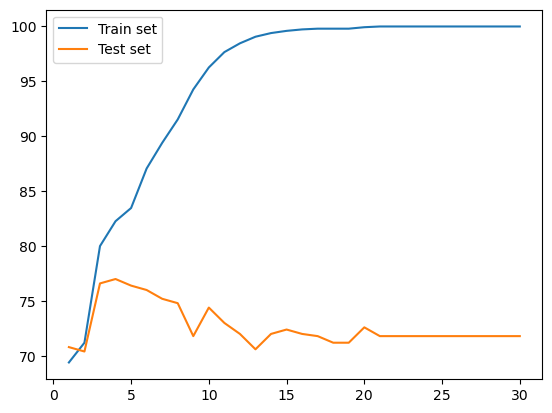

In [84]:
train_acc = []
test_acc = []
max_depths = range(1, 31)
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=1234)
    clf = clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    
    train_acc.append((y_train == y_train_pred).mean() * 100)
    test_acc.append((y_test == y_pred).mean() * 100)
    
plt.plot(max_depths, train_acc, label='Train set')
plt.plot(max_depths, test_acc, label='Test set')
plt.legend()

[Text(0.5844374320822536, 0.9772727272727273, 'x[1] <= 0.698\ngini = 0.5\nsamples = 1500\nvalue = [748, 752]'),
 Text(0.31656984034105157, 0.9318181818181818, 'x[8] <= 0.624\ngini = 0.431\nsamples = 791\nvalue = [249, 542]'),
 Text(0.1949552787762267, 0.8863636363636364, 'x[14] <= 4.005\ngini = 0.316\nsamples = 458\nvalue = [90, 368]'),
 Text(0.1170692969990805, 0.8409090909090909, 'x[5] <= -0.923\ngini = 0.279\nsamples = 436\nvalue = [73, 363]'),
 Text(0.04012371478726072, 0.7954545454545454, 'x[11] <= -4.243\ngini = 0.163\nsamples = 223\nvalue = [20, 203]'),
 Text(0.026749143191507146, 0.75, 'x[0] <= 0.23\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.021399314553205716, 0.7045454545454546, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.03209897182980857, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05349828638301429, 0.75, 'x[13] <= 2.107\ngini = 0.15\nsamples = 220\nvalue = [18, 202]'),
 Text(0.04279862910641143, 0.7045454545454546, 'x[19] <= 

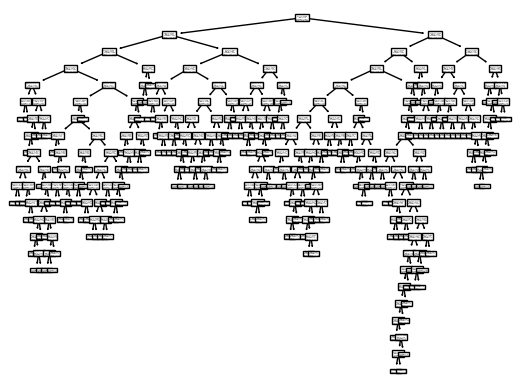

In [85]:
tree.plot_tree(clf)

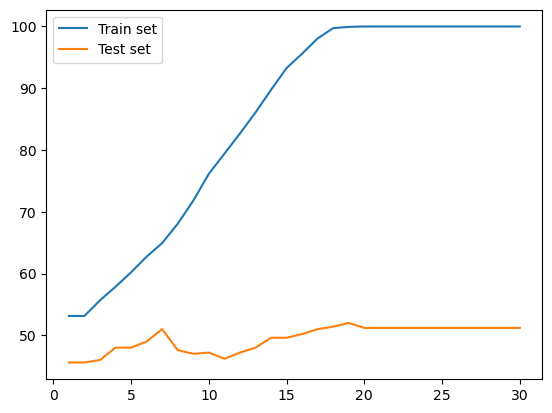

In [86]:
train_acc2 = []
test_acc2 = []
max_depths = range(1, 31)
for max_depth in max_depths:
    clf2 = DecisionTreeClassifier(max_depth=max_depth, random_state=1234)
    clf2 = clf2.fit(X_train2, y_train2)
    y_train_pred2 = clf2.predict(X_train2)
    y_pred2 = clf2.predict(X_test2)
    
    train_acc2.append((y_train2 == y_train_pred2).mean() * 100)
    test_acc2.append((y_test2 == y_pred2).mean() * 100)
    
plt.plot(max_depths, train_acc2, label='Train set')
plt.plot(max_depths, test_acc2, label='Test set')
plt.legend()

[Text(0.5844374320822536, 0.9772727272727273, 'x[1] <= 0.698\ngini = 0.5\nsamples = 1500\nvalue = [748, 752]'),
 Text(0.31656984034105157, 0.9318181818181818, 'x[8] <= 0.624\ngini = 0.431\nsamples = 791\nvalue = [249, 542]'),
 Text(0.1949552787762267, 0.8863636363636364, 'x[14] <= 4.005\ngini = 0.316\nsamples = 458\nvalue = [90, 368]'),
 Text(0.1170692969990805, 0.8409090909090909, 'x[5] <= -0.923\ngini = 0.279\nsamples = 436\nvalue = [73, 363]'),
 Text(0.04012371478726072, 0.7954545454545454, 'x[11] <= -4.243\ngini = 0.163\nsamples = 223\nvalue = [20, 203]'),
 Text(0.026749143191507146, 0.75, 'x[0] <= 0.23\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.021399314553205716, 0.7045454545454546, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.03209897182980857, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05349828638301429, 0.75, 'x[13] <= 2.107\ngini = 0.15\nsamples = 220\nvalue = [18, 202]'),
 Text(0.04279862910641143, 0.7045454545454546, 'x[19] <= 

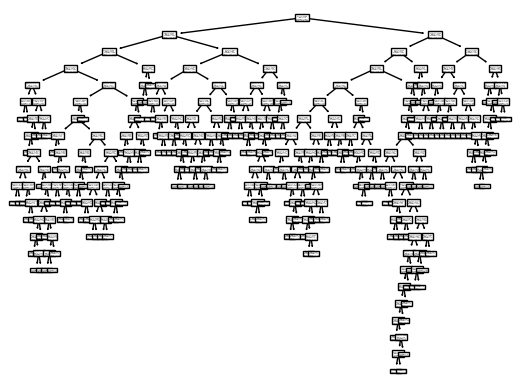

In [87]:
tree.plot_tree(clf)

### 회귀 트리 구현하기

In [88]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

In [89]:
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
reg = DecisionTreeRegressor(random_state=1234,
                            max_depth=4,
                            min_samples_split=4)
pipe = Pipeline(steps=[("scaler", scaler), ("reg", reg)])
pipe = pipe.fit(X_train, y_train)

y_pred_train = pipe.predict(X_train)
print(f'학습 데이터셋 MAE:{(np.abs(y_pred_train - y_train)).mean(): .2f}')

y_pred = pipe.predict(X_test)
print(f'테스트 데이터셋 MAE:{(np.abs(y_pred - y_test)).mean(): .2f}')

학습 데이터셋 MAE: 39.30
테스트 데이터셋 MAE: 45.67


[Text(0.45535714285714285, 0.9, 'x[2] <= 0.142\nsquared_error = 6018.646\nsamples = 296\nvalue = 150.953'),
 Text(0.19642857142857142, 0.7, 'x[8] <= 0.134\nsquared_error = 3592.887\nsamples = 182\nvalue = 118.511'),
 Text(0.10714285714285714, 0.5, 'x[5] <= 2.173\nsquared_error = 2478.292\nsamples = 131\nvalue = 101.168'),
 Text(0.07142857142857142, 0.3, 'x[6] <= 0.479\nsquared_error = 2204.612\nsamples = 129\nvalue = 98.992'),
 Text(0.03571428571428571, 0.1, 'squared_error = 2766.512\nsamples = 72\nvalue = 112.042'),
 Text(0.10714285714285714, 0.1, 'squared_error = 1008.039\nsamples = 57\nvalue = 82.509'),
 Text(0.14285714285714285, 0.3, 'squared_error = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(0.2857142857142857, 0.5, 'x[3] <= -0.942\nsquared_error = 3698.761\nsamples = 51\nvalue = 163.059'),
 Text(0.21428571428571427, 0.3, 'x[7] <= 0.319\nsquared_error = 384.204\nsamples = 7\nvalue = 106.286'),
 Text(0.17857142857142858, 0.1, 'squared_error = 77.188\nsamples = 4\nvalue = 92.25'),


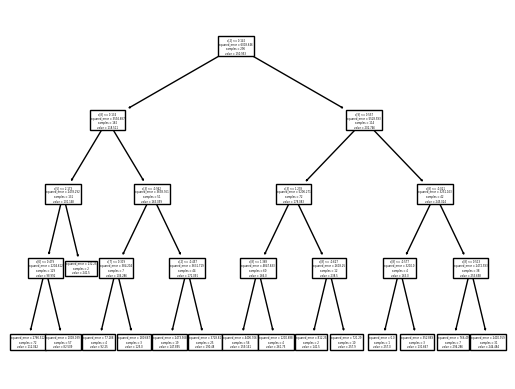

In [90]:
tree.plot_tree(reg)

### 그리드 서치로 결정 트리의 하이퍼파라미터 튜닝하기 (와인 데이터셋)

In [91]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = load_wine(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.33,
                                                  random_state=1234)

In [92]:
max_depths = [3, 4, 5]

In [93]:
from itertools import product

best_max_depth, best_acc = None, 0

for max_depth in max_depths:
    clf = DecisionTreeClassifier(random_state=1234,
                                 max_depth=max_depth)
    y_pred = clf.fit(X_train, y_train).predict(X_val)
    
    acc = (y_pred == y_val).mean()
    if acc > best_acc:
        best_acc = acc
        best_max_depth = max_depth

print('best acc:', best_acc, '\nmax_depth:', best_max_depth)

best acc: 0.95 
max_depth: 3


In [94]:
clf = DecisionTreeClassifier(random_state=1234,
                             max_depth=best_max_depth)

y_pred = clf.fit(X_train, y_train).predict(X_test)
acc = np.abs(y_pred == y_test).mean()
print(f'정확도:{acc * 100: .2f}%')

정확도: 84.75%


[Text(0.5, 0.875, 'x[12] <= 842.5\ngini = 0.661\nsamples = 79\nvalue = [31, 25, 23]'),
 Text(0.2, 0.625, 'x[9] <= 3.825\ngini = 0.521\nsamples = 46\nvalue = [1, 23, 22]'),
 Text(0.1, 0.375, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(0.3, 0.375, 'x[6] <= 1.785\ngini = 0.218\nsamples = 25\nvalue = [1, 2, 22]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 22]'),
 Text(0.4, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.8, 0.625, 'x[6] <= 2.32\ngini = 0.169\nsamples = 33\nvalue = [30, 2, 1]'),
 Text(0.7, 0.375, 'x[7] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.9, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]')]

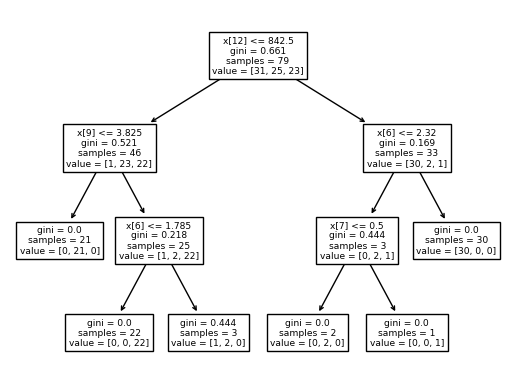

In [95]:
tree.plot_tree(clf)